In [14]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import os

# Kaggle API'sini başlat
api = KaggleApi()
api.authenticate()

# Titanic veri setini indir
api.competition_download_file('titanic', 'train.csv', path='c:/Users/MSI-NB/Desktop/Machine_Learning_Projects/Titanic_Analysis')
api.competition_download_file('titanic', 'test.csv', path='c:/Users/MSI-NB/Desktop/Machine_Learning_Projects/Titanic_Analysis')
api.competition_download_file('titanic', 'gender_submission.csv', path='c:/Users/MSI-NB/Desktop/Machine_Learning_Projects/Titanic_Analysis')

# Veri dosyalarını doğrudan okuma (zip dosyasına gerek yok)
import pandas as pd

# CSV dosyalarını yükleyelim
train_df = pd.read_csv('c:/Users/MSI-NB/Desktop/Machine_Learning_Projects/Titanic_Analysis/train.csv')
test_df = pd.read_csv('c:/Users/MSI-NB/Desktop/Machine_Learning_Projects/Titanic_Analysis/test.csv')
gender_submission_df = pd.read_csv('c:/Users/MSI-NB/Desktop/Machine_Learning_Projects/Titanic_Analysis/gender_submission.csv')

# Dosyaların ilk birkaç satırını gösterelim
print(train_df.head())
print(test_df.head())
print(gender_submission_df.head())

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket    

In [15]:
# Veri çerçevesinin genel bilgilerini kontrol edelim
print(train_df.info())  # Veri tipi, eksik veriler vb.
print(test_df.info())
print(gender_submission_df.info())

# Veri setindeki istatistiksel özet
print(train_df.describe())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [16]:
# Eksik değerleri kontrol et
print(train_df.isnull().sum())  # Her sütunda eksik olan değerlerin sayısı
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
# Sayısal sütunlarda eksik verileri ortalama ile doldurmak
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

# Kategorik sütunlarda eksik verileri mod (en sık görülen değer) ile doldurmak
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

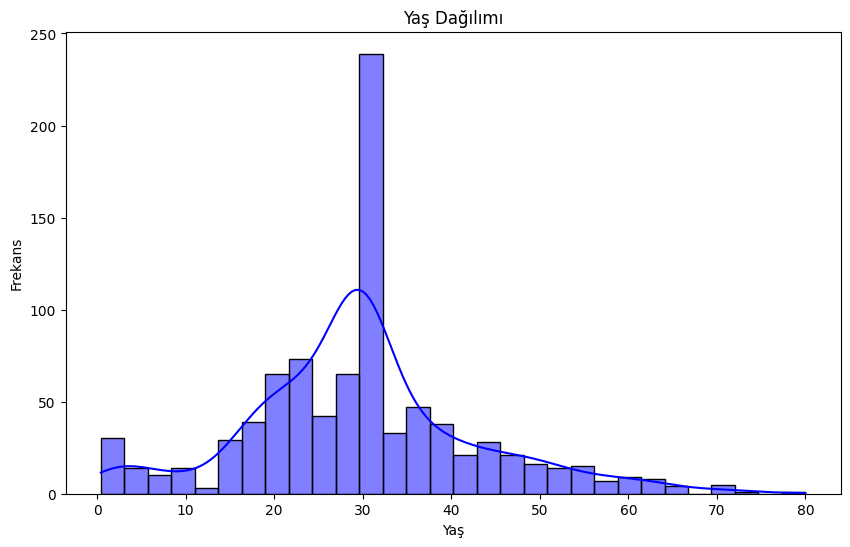

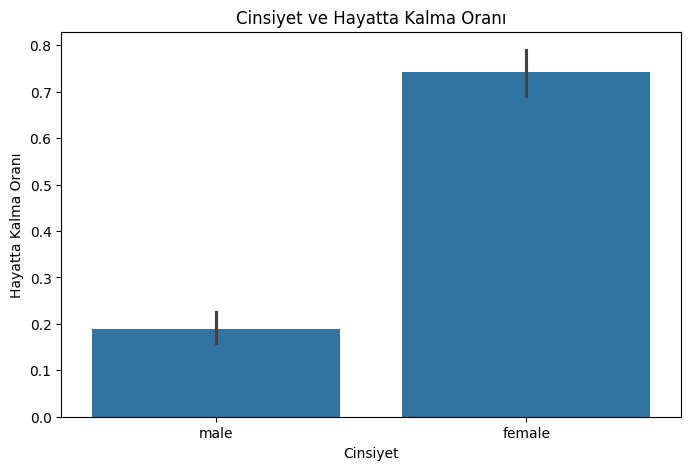

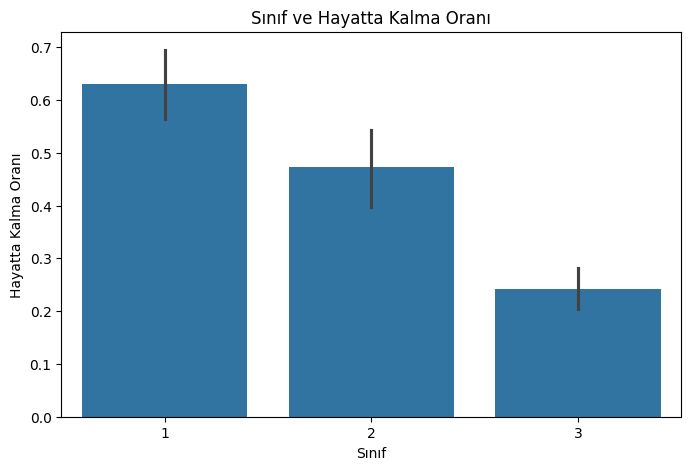

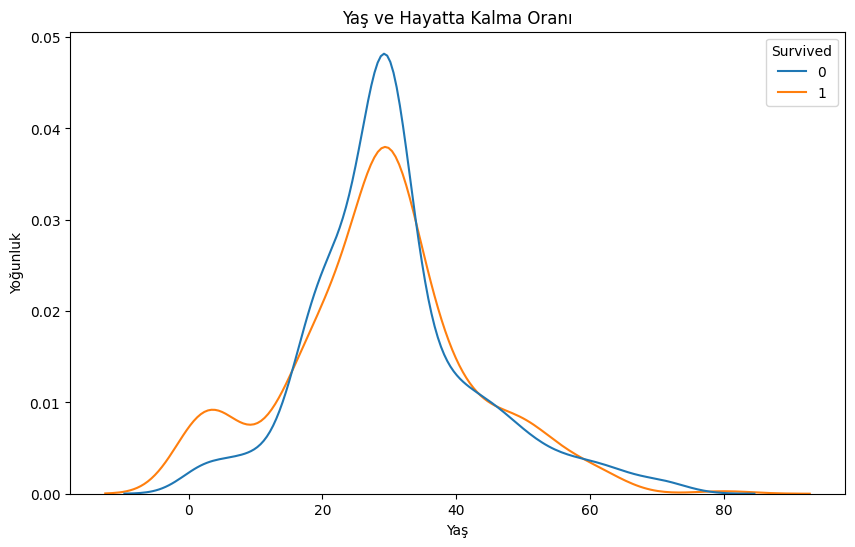

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Yaş dağılımı
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), kde=True, color='blue', bins=30)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

# 2. Cinsiyet ve Hayatta Kalma Oranı
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Cinsiyet ve Hayatta Kalma Oranı')
plt.xlabel('Cinsiyet')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

# 3. Sınıf (Pclass) ve Hayatta Kalma Oranı
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Sınıf ve Hayatta Kalma Oranı')
plt.xlabel('Sınıf')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

# 4. Yaş ve Hayatta Kalma Oranı
plt.figure(figsize=(10,6))
sns.kdeplot(data=train_df, x='Age', hue='Survived', common_norm=False)
plt.title('Yaş ve Hayatta Kalma Oranı')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.show()

In [19]:
# Sayısal sütunları seçmek
numeric_df = train_df.select_dtypes(include=['number'])

# Korelasyon matrisini oluştur
corr_matrix = numeric_df.corr()

In [20]:
# Kategorik verileri sayısallaştırma (Label Encoding)
from sklearn.preprocessing import LabelEncoder

# Örnek: 'Name' gibi bir kategorik sütunu dönüştürmek
label_encoder = LabelEncoder()
train_df['Name_encoded'] = label_encoder.fit_transform(train_df['Name'])

# Daha sonra sayısal sütunları seçerek korelasyonu hesaplayabilirsiniz
numeric_df = train_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

In [21]:
# Eksik değerleri (NaN) kaldırmak
train_df = train_df.dropna()

# Veya eksik değerleri bir değere doldurmak
train_df = train_df.fillna(0)

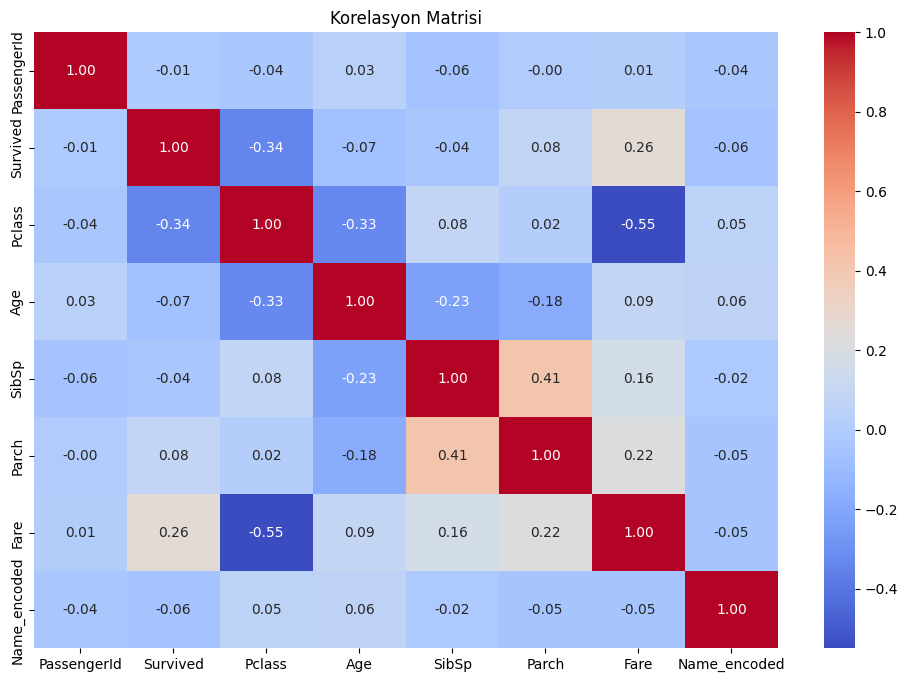

In [22]:
# Korelasyon matrisinin ısı haritasını çizme
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

In [23]:
# Cinsiyet ve sınıf bazında hayatta kalma oranları
survival_by_gender_class = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print(survival_by_gender_class)

# Yaşa göre hayatta kalma oranı
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins)
age_survival = train_df.groupby('AgeGroup')['Survived'].mean()
print(age_survival)

Pclass         1         2         3
Sex                                 
female  0.962963  0.900000  0.666667
male    0.410526  0.666667  0.333333
AgeGroup
(0, 10]      0.800000
(10, 20]     0.789474
(20, 30]     0.694915
(30, 40]     0.760000
(40, 50]     0.515152
(50, 60]     0.636364
(60, 70]     0.222222
(70, 80]     0.500000
(80, 90]          NaN
(90, 100]         NaN
Name: Survived, dtype: float64


C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_29420\519996483.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train_df.groupby('AgeGroup')['Survived'].mean()


In [24]:
# Cinsiyet verisini sayısal verilere dönüştürme (0 = erkek, 1 = kadın)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Embarked sütununu sayısal verilere dönüştürme (örneğin, C = 0, Q = 1, S = 2)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Yaş grubu ve sınıf gibi özellikler türetilebilir.